In [34]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy
from scipy import ndimage
from skimage import io
from skimage.color     import rgb2gray
from breanna.feature_extraction import (graylevel_contrast, dominant_bins, graylevel_std, 
                                        dominant_colors, dominant_extent, number_connected_components, 
                                        number_of_connected_components_saliency_map, 
                                        number_of_characters, size_of_largest_connected_component)

In [35]:
path_test_pics = './test_pics/'

# Documentation for Visual Features Extraction

As extensively remarked, Breanna is able to extract Visual Features (VF) from the pictures appearing in an advertisement banner. In the following notebook, we will explain what kind of VF are extrapolatable, with examples. The way those features are extracted is taken from the paper Azimi et al., 2012.

## 1. Gray level contrast

From the gray-scale of an RGB image, we can obtain its histogram, which is a probability distribution of the gray levels of the image. Let's see an example.

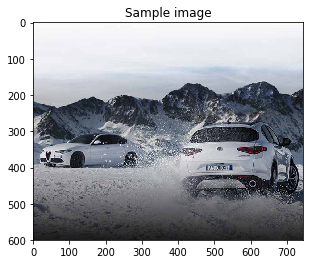

In [36]:
test_pic = io.imread(path_test_pics + 'img_5.jpg')
plt.title('Sample image')
plt.imshow(test_pic)

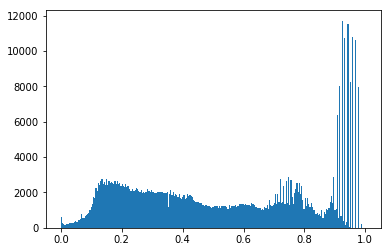

In [37]:
test_gray = rgb2gray(test_pic)
hist = plt.hist(test_gray.ravel(), bins=256, range=(0.0, 1.0))

As it is interpretable as a probability distribution, we calculate the __grey level contrast__ as the width of the middle 95% mass in the gray level histogram.

In this specific case, with the sample image, the __gray level contrast__ result will be:

In [38]:
print(graylevel_contrast(test_pic))

0.8392156862745098


## 2. Dominant bins

For calculating the __dominant bins__ feature, we compute the number of bins (out of 256) which are greater than a certain threshold. In this specific case, the threshold is calculated as $0.01*max(bins)$

Let us take again the same sample image showed above, and let us plot its histogram.

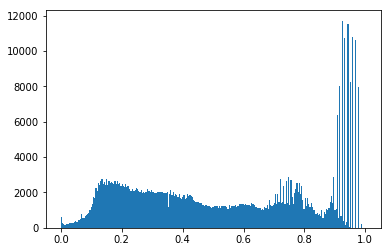

In [39]:
hist, _, _ = plt.hist(test_gray.ravel(), bins=256, range=(0.0, 1.0))

We found its maximum:

In [40]:
max_hist = max(hist)
print(max_hist)

11709.0


Let us count how many bins exceed the threshold, which will be given by the number of bins which go over the following threshold:

In [41]:
print('The threshold is: ' + str(0.01 * max_hist))

The threshold is: 117.09


In [42]:
print('The number of dominant bins in the test picture is ' + str(np.sum(hist >= 0.01 * np.max(hist))))

The number of dominant bins in the test picture is 247


## 3. Gray level standard deviation

It simply computes the __standard deviation of the gray levels__ in a picture, so before computing it, the function will convert the picture in gray-scale, and then do the computation of the standard deviation.

In [43]:
print('The gray level standard deviation in the test picture is ' + str(graylevel_std(test_pic)))

The gray level standard deviation in the test picture is 0.29608646067716504


## 4. Dominant Colors & Dominant Extent

This feature is one of the ways to measure the simplicity of an image, as it counts the number of __dominant colors__ present in it.
For a given image, we quantize each RGB channel into 8 values, creating a histogram of 512 bins. Then, we count how many bins exceed a threshold calculated as $0.01*max(bins)$.

In [44]:
print('The number of dominant colors in the test picture is ' + str(dominant_colors(test_pic)))

The number of dominant colors in the test picture is 22


Along with this feature, we compute the relative size of the dominant bin with respect to the whole image, and this yields the __dominant extent__. This is computed as $$\frac{max(bins)}{\mid{image}\mid}$$

In [45]:
print('The dominant extent of the most dominant color in the test picture is ' + str(dominant_extent(test_pic)))

The dominant extent of the most dominant color in the test picture is 0.21098434004474273


## 5. Number of connected component & size of the largest connected component

Connected-component labeling is used in computer vision to detect connected regions in an image. To show examples, we will now take into consideration a simple image, chosen for better comprehension.

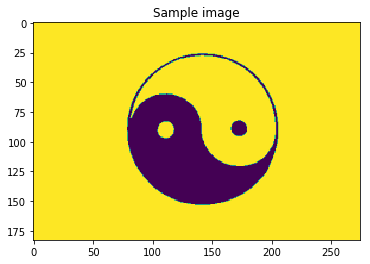

In [46]:
test_pic_ncc = io.imread(path_test_pics + 'NCC.png')
plt.title('Sample image')
plt.imshow(test_pic_ncc)

Number of connected components is 4


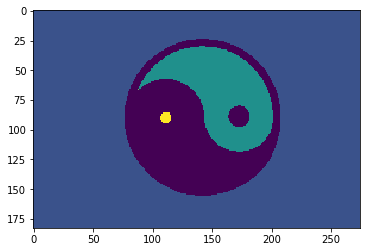

In [47]:
# smooth the image (to remove small objects)
blur_radius = 1.0

imgf = ndimage.gaussian_filter(test_pic_ncc, blur_radius)
threshold = 250 #this value is configurable from the backend of the tool, and it's set to 200

# find connected components
labeled, nr_objects = ndimage.label(imgf > threshold) 
print("Number of connected components is " + str(nr_objects))

plt.imshow(labeled)

plt.show()

Along with this, we compute also the __size of the largest connected component__.

In [48]:
print('The size of the largest connected component in the test picture is ' + str(size_of_largest_connected_component(test_pic_ncc)))

The size of the largest connected component in the test picture is 43884


## 6. Number of connected component in the saliency map

Saliency computation is an attempt to capture which parts of an image are different from the rest and thus are more likely to capture human's eyes. Here is an example of a picture and relative saliency map.

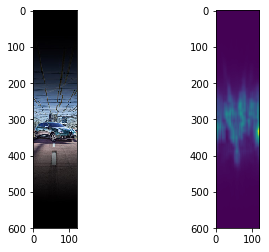

In [49]:
test_pic_sm = io.imread(path_test_pics + 'executive_120.jpg')
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
saliency_map = saliency.computeSaliency(test_pic_sm)[1]
f, pics = plt.subplots(1,2)
pics[0].imshow(test_pic_sm)
pics[1].imshow(saliency_map)

A similar procedure as the one just described is then applied to compute the __number of connected components in the saliency map__.

In [50]:
print("Number of connected components in the test picture is " + str(number_of_connected_components_saliency_map(test_pic_sm)))


Number of connected components in the test picture is 1


## 7. Number of characters

The name of the feature is self-explicative. It retrieves the number of characters present in the picture.

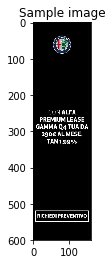

In [51]:
test_pic_char = io.imread(path_test_pics + 'fallback_160x600.jpg')
plt.title('Sample image')
plt.imshow(test_pic_char)

In [52]:
print("Number of characters in the test picture is " + str(number_of_characters(test_pic_char)))


Number of characters in the test picture is 70
